In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import scipy.optimize
import sk
learn.decomposition
import sklearn.manifold
import sklearn.model_selection

football_original = pd.read_csv("initial_dataset_final.csv")
football = football_original.drop('season',axis=1)
df = football.copy()

df.head()

,hPos,hGSPG,hGCPG,hCSPG,hPtsPG,aPos,aGSPG,aGCPG,aCSPG,aPtsPG,target
0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0
1,4.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,1
2,5.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,2
3,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1
4,7.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,1


In [3]:
numerical_columns = ['hPos','hGSPG','hGCPG','hCSPG','hPtsPG','aPos','aGSPG','aGCPG','aCSPG','aPtsPG']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10126 entries, 0 to 10125
Data columns (total 11 columns):
hPos      10126 non-null float64
hGSPG     10126 non-null float64
hGCPG     10126 non-null float64
hCSPG     10126 non-null float64
hPtsPG    10126 non-null float64
aPos      10126 non-null float64
aGSPG     10126 non-null float64
aGCPG     10126 non-null float64
aCSPG     10126 non-null float64
aPtsPG    10126 non-null float64
target    10126 non-null int64
dtypes: float64(10), int64(1)
memory usage: 870.3 KB


In [5]:
# select the features
features = numerical_columns
X = (df[features].values)

# rescale the features, so they have the same variance
for k in range(len(features)):
    X[:,k] = X[:,k] / np.std(X[:,k])

pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

# how the results are returned
print("μ:", pca.mean_)
k,i = 2,10
print(f"δ[k={k}]:", pca.components_[0])
print(f"λ[k={k},i={i}]:", pca_result[i,0])

μ: [1.87419319 2.3285957  2.51235848 1.65053844 2.27871791 1.8442905
 2.31229891 2.51594189 1.66433325 2.30976048]
δ[k=2]: [-0.35212646  0.32151998 -0.2078646   0.31240365  0.40332659 -0.33451721
  0.30084749 -0.19413633  0.29065157  0.38023356]
λ[k=2,i=10]: -3.897338189941622


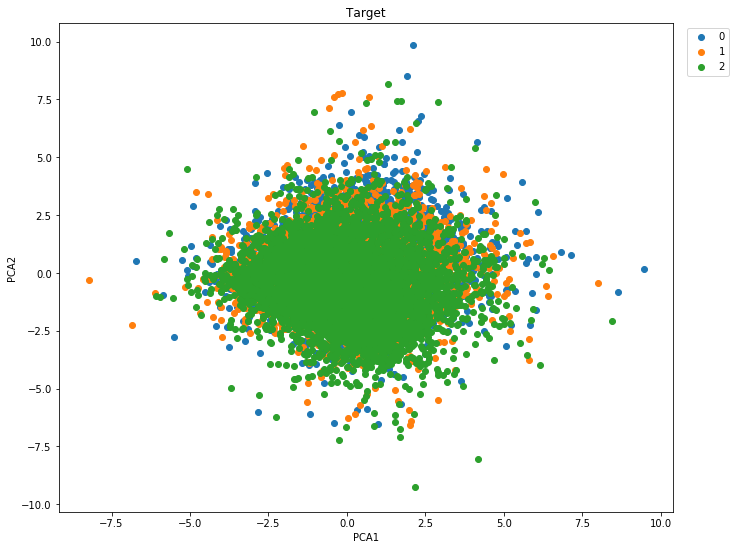

In [6]:
p1,p2 = pca_result[:,0], pca_result[:,1]

categorical_values = df['target'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Target")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()

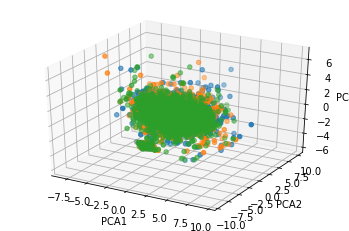

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p1,p2,p3 = pca_result[:,0], pca_result[:,1], pca_result[:,2]

categorical_values = df['target'].tolist()
distinct_levels_for_category = set(categorical_values)

with plt.rc_context({'figure.figsize': (15,12)}):
    for lvl in distinct_levels_for_category:
        i = [categorical_values[k] == lvl for k in range(len(categorical_values))]
        ax.scatter(p1[i], p2[i], p3[i], label=lvl)
        
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()


In [8]:
big_set = football_original.query("season < 22")
big_set.drop("season",axis=1,inplace=True)
small_set = football_original.query("season > 21")
small_set.drop("season",axis=1,inplace=True)

features = ['hPos','hGSPG','hGCPG','hCSPG','hPtsPG','aPos','aGSPG','aGCPG','aCSPG','aPtsPG']
X = (small_set[features].values)
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)

/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1900 samples in 0.016s...
[t-SNE] Computed neighbors for 1900 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1900
[t-SNE] Computed conditional probabilities for sample 1900 / 1900
[t-SNE] Mean sigma: 0.979559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.384575
[t-SNE] KL divergence after 1000 iterations: 0.561490


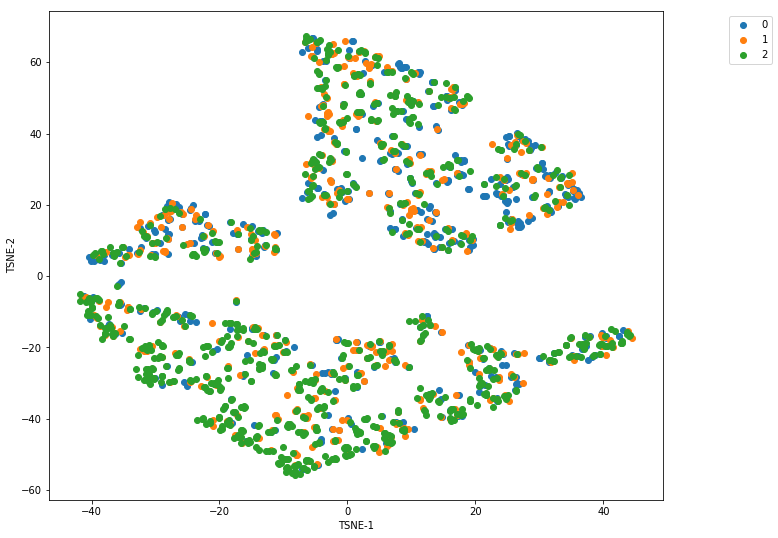

In [12]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

column_values = small_set['target'].tolist()
distinct_levels_for_column = set(column_values)

with plt.rc_context({'figure.figsize': (11,9)}):
    for lvl in distinct_levels_for_column:
        i = [column_values[k] == lvl for k in range(len(column_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
#plt.gca().set_aspect('equal')
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()